<a href="https://colab.research.google.com/github/aashrithresearch/Pets/blob/main/pets_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *
from fastai.callback.fp16 import *
import torch
import os
from google.colab import drive

In [2]:
path = untar_data(URLs.PETS)

In [3]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [4]:
(path/'images').ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_18.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_77.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_87.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_8.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_175.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_56.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_22.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_12.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_228.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_73.jpg')...]

In [5]:
re.findall(r'(.+)_\d+.jpg$', (path/'images').ls()[0].name)

['staffordshire_bull_terrier']

In [6]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                    get_items=get_image_files,
                    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                    splitter=RandomSplitter(valid_pct=0.2, seed=42),
                    item_tfms=Resize(400),
                    batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/'images')

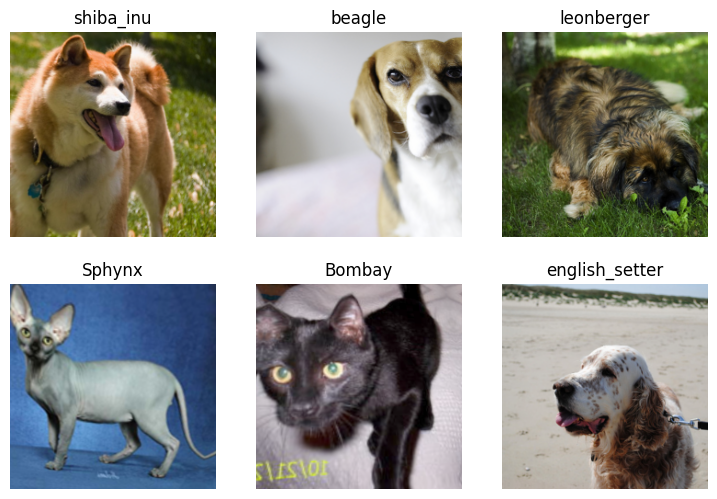

In [7]:
dls.show_batch(nrows=2, ncols=3)

In [9]:
learn = vision_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(10, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,time
0,2.217009,0.465714,0.868065,01:21
1,0.845167,0.342515,0.890392,01:12
2,0.526016,0.324049,0.902571,01:11


epoch,train_loss,valid_loss,accuracy,time
0,0.288337,0.228228,0.930988,01:17
1,0.228278,0.219782,0.935724,01:17
2,0.203041,0.250739,0.931664,01:19
3,0.186935,0.237644,0.929635,01:19
4,0.126874,0.214242,0.941137,01:19
5,0.096001,0.205947,0.942490,01:19
6,0.078259,0.196781,0.939107,01:20
7,0.052032,0.184268,0.946549,01:17
8,0.039191,0.184534,0.946549,01:21
9,0.035037,0.182588,0.949932,01:19


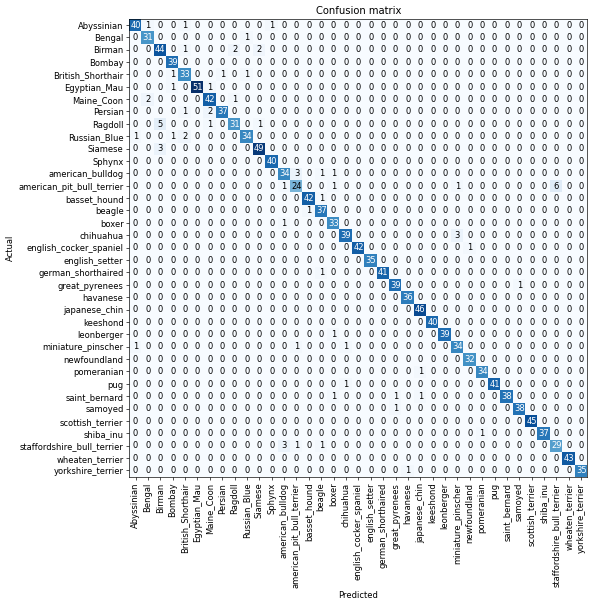

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)